Final Project
<p><br><strong>Attribute Information:</strong></p>

<blockquote><ol><li>age</li><li>sex</li><li>chest pain type (4 values)</li><li>resting blood pressure</li><li>serum cholesterol in mg/dl</li><li>fasting blood sugar &gt; 120 mg/dl</li><li>resting electrocardiographic results (values 0,1,2)</li><li>maximum heart rate achieved</li><li>exercise induced angina</li><li>oldpeak = ST depression induced by exercise relative to rest</li><li>the slope of the peak exercise ST segment</li><li>number of major vessels (0-3) colored by flouroscopy</li><li>thal: 3 = normal; 6 = fixed defect; 7 = reversible defect</li></ol></blockquote>

In [6]:
# import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# read data csv
dataframe = pd.read_csv('heart.csv')
# ambil header csv
dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<h1><strong>Logistic Regression</strong></h1>

In [26]:
from sklearn.model_selection import train_test_split
data = dataframe.drop('target',axis=1)
label = dataframe.target
x_1, x_2, y_1, y_2 = train_test_split(data,label,test_size=0.2)

In [27]:
# import package yang diperlukan
from sklearn.linear_model import LogisticRegression

# tambahan untuk cek tingkat akurasi model
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
# bikin model
model = LogisticRegression(solver="liblinear")
# training model
model.fit(x_1, y_1)

#cek skor model
model.score(x_1,y_1)

0.8677685950413223

In [29]:
print(classification_report(y_1, model.predict(x_1)))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84       107
           1       0.85      0.93      0.89       135

    accuracy                           0.87       242
   macro avg       0.87      0.86      0.86       242
weighted avg       0.87      0.87      0.87       242



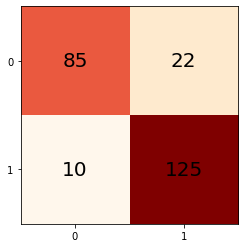

In [30]:
cm = confusion_matrix(y_1, model.predict(x_1))

fig,ax = plt.subplots(figsize=(4,4))
ax.imshow(cm, cmap="OrRd")

ax.xaxis.set(ticks=(0,1), ticklabels=('0', '1'))
ax.yaxis.set(ticks=(0,1), ticklabels=('0', '1'))

for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j], 
                ha='center', va='center', color='black',
                fontsize=20)